<a href="https://colab.research.google.com/github/pranee31/Boston-Housing/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

importing the boston house price dataset

In [ ]:
path = "/content/drive/MyDrive/dataset/HousingData.csv"
df = pd.read_csv(path)

In [ ]:
print(df.keys())


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [ ]:
boston = pd.DataFrame(df)
boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
boston.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
mean = df['CRIM'].mean()
means = df['ZN'].mean()
mw = df['INDUS'].mean()
xc = df['CHAS'].mean()
dg = df['AGE'].mean()
fg = df['LSTAT'].mean()

In [ ]:
df['CRIM'].fillna(value=mean,inplace = True)
df['ZN'].fillna(value = means,inplace = True)
df['INDUS'].fillna(value=mw,inplace= True)
df['CHAS'].fillna(value=xc,inplace= True)
df['AGE'].fillna(value= dg,inplace=True)
df['LSTAT'].fillna(value = fg,inplace=True)

In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:

correlation_matrix = boston.corr()
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data = correlation_matrix,annot = True)

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
x = boston['LSTAT']
y = boston['MEDV']
plt.scatter(x,y)
plt.xlabel('lstat')
plt.ylabel('medv')


NameError: ignored

<Figure size 500x500 with 0 Axes>

Text(0, 0.5, 'medv')

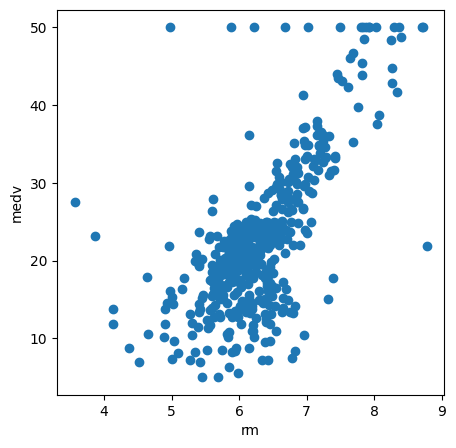

In [ ]:
plt.figure(figsize=(5,5))
x = boston['RM']
y = boston['MEDV']
plt.scatter(x,y)
plt.xlabel('rm')
plt.ylabel('medv')


In [ ]:
x = boston[['LSTAT','RM']]
y = boston['MEDV']
x.head()






,LSTAT,RM
0,4.980000,6.575
1,9.140000,6.421
2,4.030000,7.185
3,2.940000,6.998
4,12.715432,7.147


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15,random_state = 5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
type(x_train)

(430, 2)
(76, 2)
(430,)
(76,)


pandas.core.frame.DataFrame

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)


LinearRegression()

In [ ]:
y_train_predict = lin_model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train,y_train_predict)))
print("the model performance for training set")
print('RMSE is {}'.format(rmse))
print(r2_score(y_train,y_train_predict))
print("\n")
#on testing dataset

y_test_predict = lin_model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test,y_test_predict)))
print("the model testing accuracy is")
print("rmse is {}".format(rmse))
print(r2_score(y_test,y_test_predict))
print()

print("bias",lin_model.intercept_)

the model performance for training set
RMSE is 5.690166149564819
0.6243670772097579


the model testing accuracy is
rmse is 5.211140218997703
0.6343709320860884

bias -0.8084280204711476


Text(0, 0.5, 'predicted')

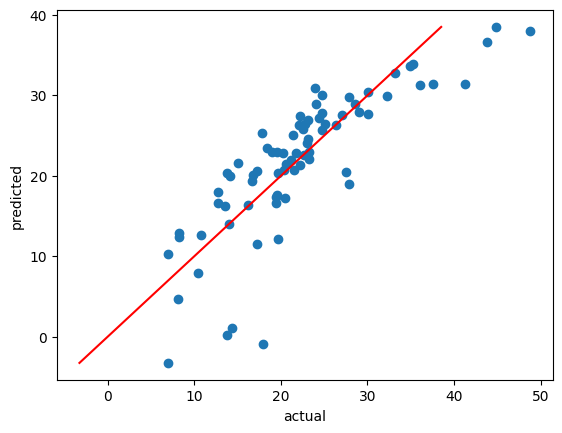

In [ ]:
plt.scatter(y_test,y_test_predict)
plt.plot([min(y_test_predict),max(y_test_predict)],[min(y_test_predict),max(y_test_predict)],color = 'red')
plt.xlabel('actual')
plt.ylabel('predicted')